In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r"/kaggle/input/student-performance-predictions/student_performance.csv")
df

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,1,John,Male,85,15,78,1,High,80
1,2,Sarah,Female,90,20,85,2,Medium,87
2,3,Alex,Male,78,10,65,0,Low,68
3,4,Michael,Male,92,25,90,3,High,92
4,5,Emma,Female,88,18,82,2,Medium,85
5,6,Olivia,Female,95,30,88,1,High,90
6,7,Daniel,Male,70,8,60,0,Low,62
7,8,Sophia,Female,85,17,77,1,Medium,78
8,9,James,Male,82,12,70,2,Low,72
9,10,Isabella,Female,91,22,86,3,High,88


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   StudentID                  10 non-null     int64 
 1   Name                       10 non-null     object
 2   Gender                     10 non-null     object
 3   AttendanceRate             10 non-null     int64 
 4   StudyHoursPerWeek          10 non-null     int64 
 5   PreviousGrade              10 non-null     int64 
 6   ExtracurricularActivities  10 non-null     int64 
 7   ParentalSupport            10 non-null     object
 8   FinalGrade                 10 non-null     int64 
dtypes: int64(6), object(3)
memory usage: 848.0+ bytes


****
### Data Visualization
****

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

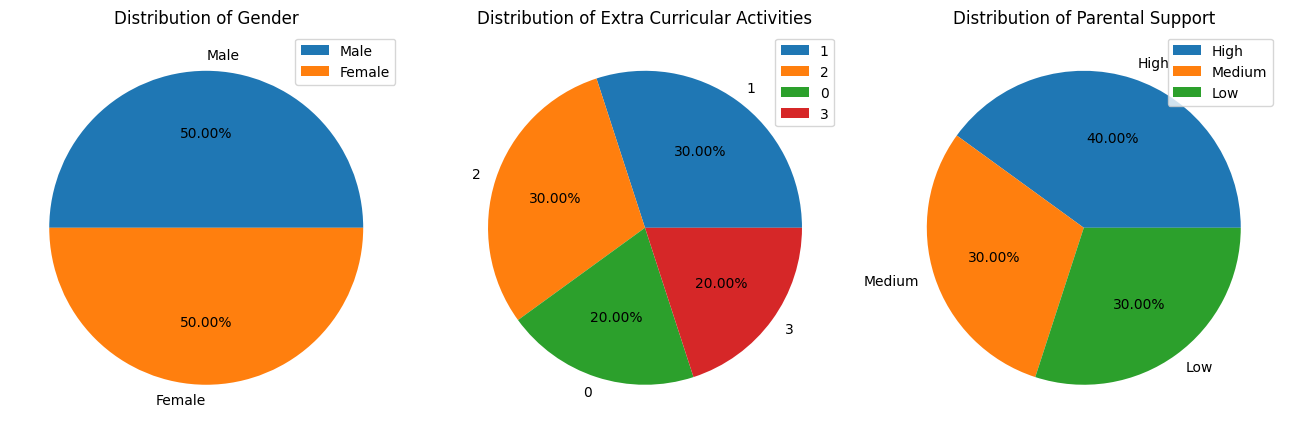

In [5]:
tdf=df['Gender'].value_counts().reset_index()
tdf.columns=['Gender','count']
tdf1=df['ExtracurricularActivities'].value_counts().reset_index()
tdf1.columns=['ExtracurricularActivities','count']
tdf2=df['ParentalSupport'].value_counts().reset_index()
tdf2.columns=['ParentalSupport','count']
fig,axs=plt.subplots(1,3,figsize=(13,13))
axs[0].set_title("Distribution of Gender")
axs[0].pie(x=tdf['count'],labels=tdf['Gender'],autopct='%.2f%%')
axs[0].legend(tdf['Gender'])
axs[1].set_title("Distribution of Extra Curricular Activities")
axs[1].pie(x=tdf1['count'],labels=tdf1['ExtracurricularActivities'],autopct='%.2f%%')
axs[1].legend(tdf1['ExtracurricularActivities'])
axs[2].set_title("Distribution of Parental Support")
axs[2].pie(x=tdf2['count'],labels=tdf2['ParentalSupport'],autopct='%.2f%%')
axs[2].legend(tdf2['ParentalSupport'])
plt.tight_layout()
plt.show()

**Takeaways:**
1. There are equall number of Male and Female students in this dataset
2. For Extra Curricular Activities around 80% of the students have taken up Extra Curricular activities, where 20% of the students have taken up 3 kinds
of Extra Curricular Activities
3. Around 70% of the students benefit from medium to high Parental Support. Whereas the rest 30% of the unlucky ones try to benefit from a Low Parental 
Support :(

**Overall, the data reveals a generally positive student population with a strong inclination towards extracurricular involvement and a significant number of students benefiting from supportive parental relationships.**

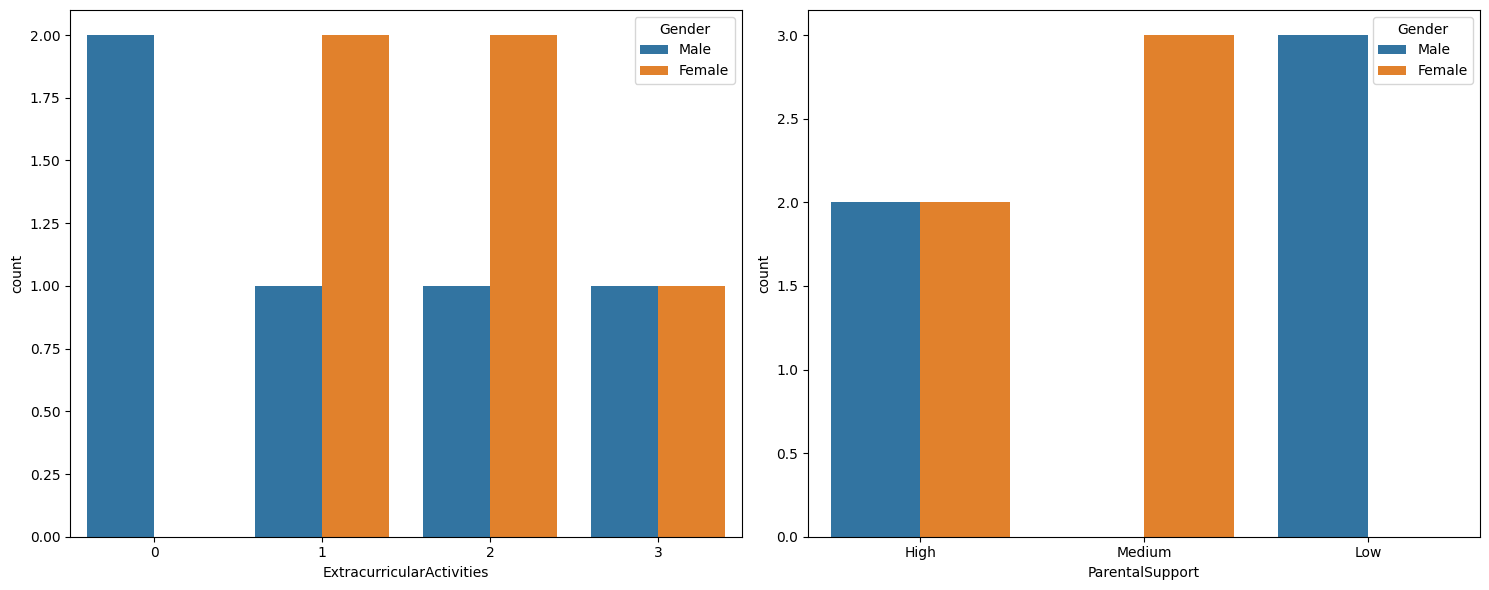

In [6]:
fig,axs=plt.subplots(1,2,figsize=(15,6))
sns.countplot(x=df['ExtracurricularActivities'],hue=df['Gender'],ax=axs[0])
sns.countplot(x=df['ParentalSupport'],hue=df['Gender'],ax=axs[1])
plt.tight_layout()
plt.show()

**Extracurricular Activities vs Gender (Left Plot):**

**Observation:**
1. The number of students not participating in extracurricular activities (category 0) is higher for males compared to females which is extreamly Concerning
2. Females show higher participation in 1 and 2 extracurricular activities compared to males.
3. Both genders show almost equal participation in 3 extracurricular activities, with a slightly lower overall count.

**Conclusion:**

Female students are always engaged in an extracurricular activitiy which is great, while male students are more likely not to engage in any.

**Parental Support vs Gender (Right Plot):**
**Observation:**
1. There is equal distribution of male and female students receiving high parental support.
2. Female students dominate the medium parental support category, indicating a higher tendency for medium-level support in this group.
3. Male students are the only ones in the low parental support category, with no females represented.

**Conclusion:**

Female Students tend to recieve Medium and High Parental support which explains how they are dominating in the extracurricular activities corner.This highlights how Parental Support influences students Taking up ExtraCurricular Activities.

Male Students recieve either High or Little Parental Support (which is greater), that explains why a large portion of Male Students dont pick up any extra curricular activities **Tragic :(**.

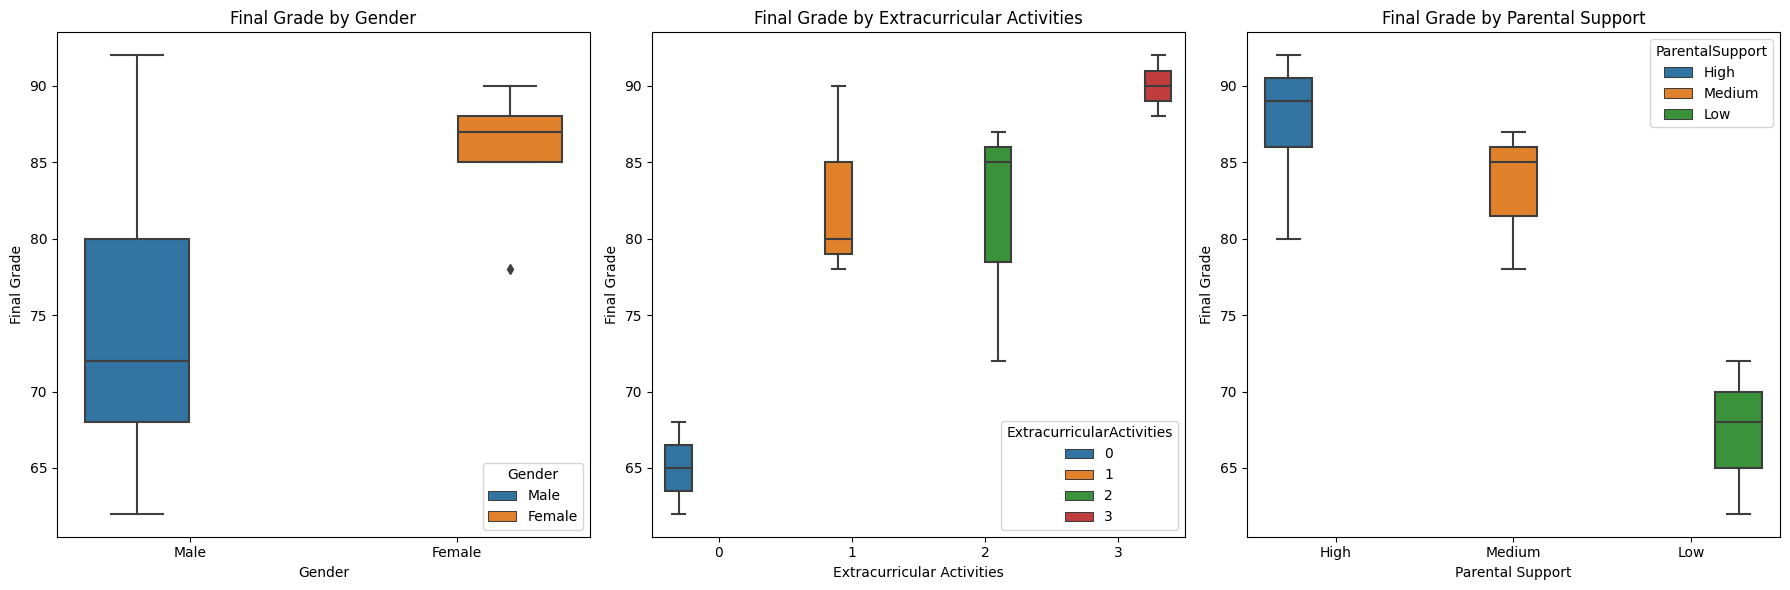

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(x='Gender', y='FinalGrade', data=df, ax=axs[0],hue='Gender')
axs[0].set_title('Final Grade by Gender')
axs[0].set_xlabel('Gender')
axs[0].set_ylabel('Final Grade')

sns.boxplot(x='ExtracurricularActivities', y='FinalGrade', data=df, ax=axs[1],hue='ExtracurricularActivities')
axs[1].set_title('Final Grade by Extracurricular Activities')
axs[1].set_xlabel('Extracurricular Activities')
axs[1].set_ylabel('Final Grade')

sns.boxplot(x='ParentalSupport', y='FinalGrade', data=df, ax=axs[2],hue='ParentalSupport')
axs[2].set_title('Final Grade by Parental Support')
axs[2].set_xlabel('Parental Support')
axs[2].set_ylabel('Final Grade')

plt.tight_layout()
plt.show()

**Final Grade by Gender:**

1. Females tend to have higher final grades compared to males, with less variability in their scores.
2. The median grade for females is higher than that for males.
3. There are some outliers in the female group, but overall, females outperform males on average.

**Final Grade by Extracurricular Activities:**

1. Students involved in more extracurricular activities (particularly those with 3 activities) tend to have higher final grades, with less spread in their scores.
2. The boxplot shows an increasing trend in grades as the number of extracurricular activities increases.
3. The students with no extracurricular activities have the lowest median final grades, while students involved in 3 activities have the highest.

**Final Grade by Parental Support:**

1. Students with higher parental support tend to have better final grades.
2. There is a clear positive correlation between parental support and final grade, with high parental support resulting in the highest median grades, while low parental support is associated with lower grades.
3. The spread of grades is also smaller for students with high parental support, indicating more consistency in their performance.


**Overall:**

Gender, extracurricular activities, and parental support all appear to significantly influence final grades. Female students, those engaged in more extracurricular activities, and students with high parental support tend to achieve higher academic outcomes.

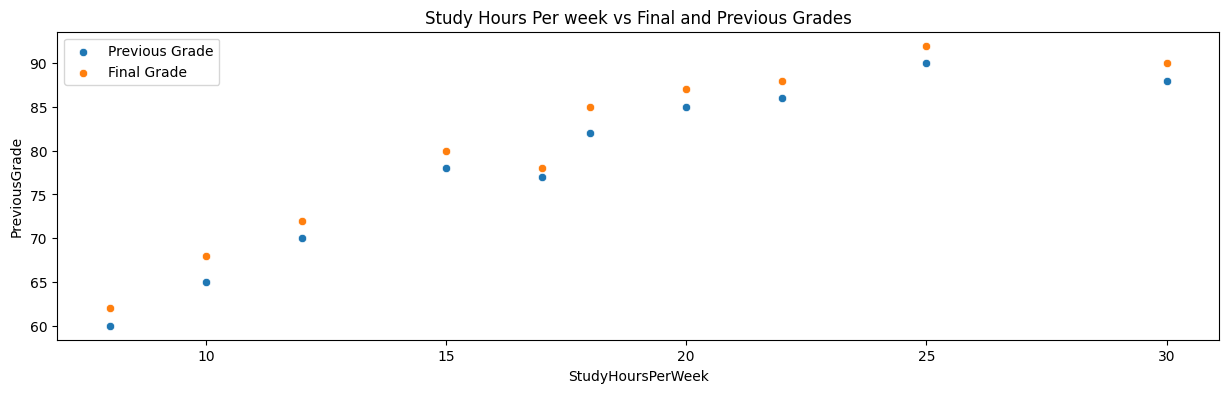

In [8]:
plt.figure(figsize=(15, 4))
sns.scatterplot(data=df, x='StudyHoursPerWeek', y='PreviousGrade', label='Previous Grade')
sns.scatterplot(data=df, x='StudyHoursPerWeek', y='FinalGrade', label='Final Grade')
plt.title("Study Hours Per week vs Final and Previous Grades")
plt.legend()
plt.show()

**Findings:**

1. More study hours per week are positively associated with higher academic performance, both in terms of previous and final grades.
2. Consistency between previous and final grades can also be inferred, as students with good previous grades tend to continue performing well with adequate study time.

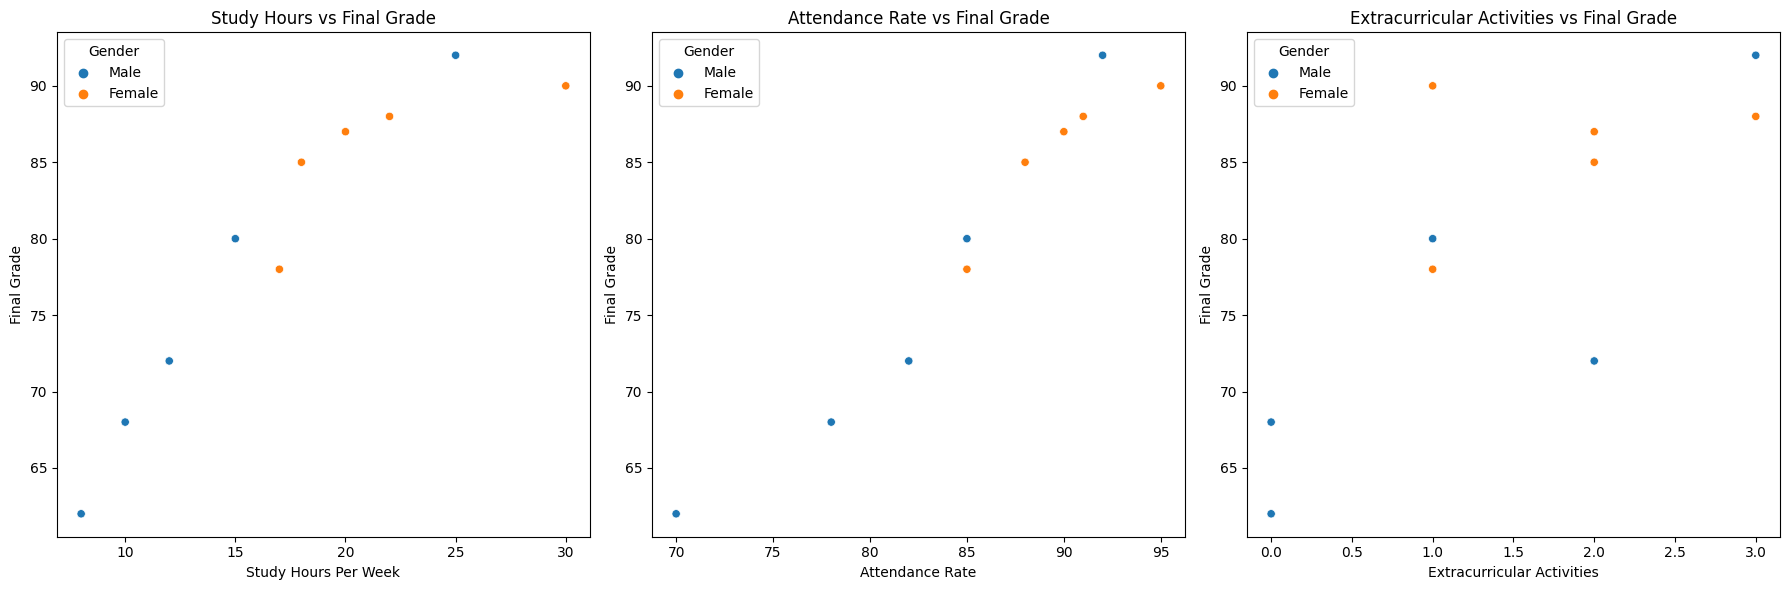

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

sns.scatterplot(x=df['StudyHoursPerWeek'], y=df['FinalGrade'], ax=axs[0],hue=df['Gender'])
axs[0].set_title('Study Hours vs Final Grade')
axs[0].set_xlabel('Study Hours Per Week')
axs[0].set_ylabel('Final Grade')


sns.scatterplot(x=df['AttendanceRate'], y=df['FinalGrade'], ax=axs[1],hue=df['Gender'])
axs[1].set_title('Attendance Rate vs Final Grade')
axs[1].set_xlabel('Attendance Rate')
axs[1].set_ylabel('Final Grade')


sns.scatterplot(x=df['ExtracurricularActivities'], y=df['FinalGrade'], ax=axs[2],hue=df['Gender'])
axs[2].set_title('Extracurricular Activities vs Final Grade')
axs[2].set_xlabel('Extracurricular Activities')
axs[2].set_ylabel('Final Grade')

plt.tight_layout()
plt.show()

**Final Grade vs Study Hours Per Week:**
1. Like the previous plot there is a positive correlation between Study hours per week and Final Grade
2. Female Studetns tend to study for more hours and therefore bring out higher final Grades than their Male counterparts

**Final Grade vs Attendance Rate:**
1. The Scatter Plot shows positive correlation between the Final grades and attendace rate of students. Higher atrendence leads to Higher Grades
2. Female students tend to attend more than the male students and perform better. This is due to the previous conclusion that they recieve comparitivelly more Parental guidance and support

**Final Grade vs Extracurricular Activity:**
1. The relationship between extracurricular activities and final grades is less linear compared to the other two plots, but there is still a general trend of higher grades with increased involvement in extracurricular activities.
2. Both male and female students show some improvement in final grades with increasing extracurricular participation, though male students show more variation in lower grade ranges.
3. Involvement in extracurricular activities may positively influence academic performance, but the impact is less pronounced compared to study hours and attendance.

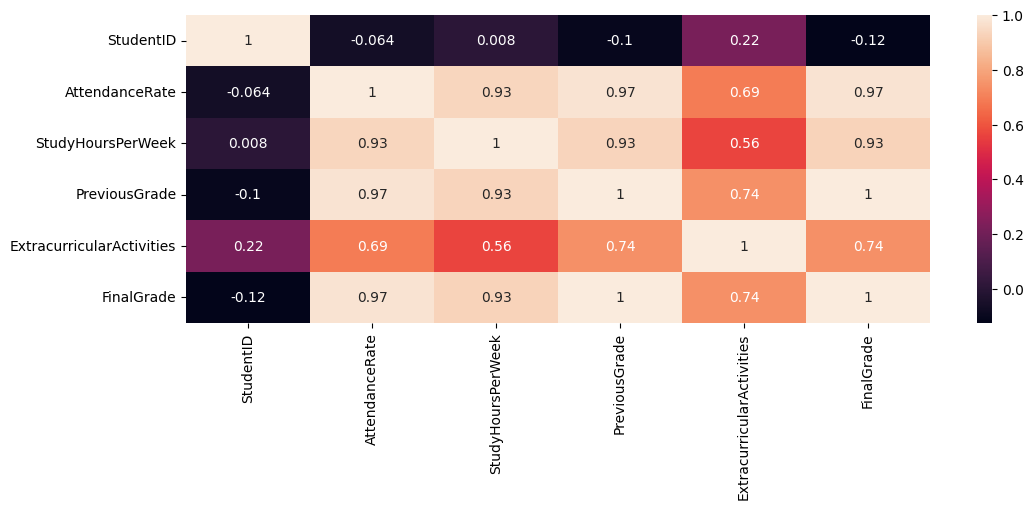

In [10]:
plt.figure(figsize=(12,4))
tdf=df.select_dtypes(include=['int64'])
sns.heatmap(tdf.corr(),annot=True)
plt.show()

****
### Data Preprocessing
****

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   StudentID                  10 non-null     int64 
 1   Name                       10 non-null     object
 2   Gender                     10 non-null     object
 3   AttendanceRate             10 non-null     int64 
 4   StudyHoursPerWeek          10 non-null     int64 
 5   PreviousGrade              10 non-null     int64 
 6   ExtracurricularActivities  10 non-null     int64 
 7   ParentalSupport            10 non-null     object
 8   FinalGrade                 10 non-null     int64 
dtypes: int64(6), object(3)
memory usage: 848.0+ bytes


In [12]:
df.drop(columns=['StudentID','Name'],inplace=True,axis=1)
print(df['Gender'].value_counts())

Gender
Male      5
Female    5
Name: count, dtype: int64


In [13]:
df['Gender']=df['Gender'].apply(lambda x: 1 if x=='Male' else 0)
print(df['ParentalSupport'].value_counts())

ParentalSupport
High      4
Medium    3
Low       3
Name: count, dtype: int64


In [14]:
df['ParentalSupport']=df['ParentalSupport'].apply(lambda x: 2 if x=='High' else 1 if x=='Medium' else 0)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Gender                     10 non-null     int64
 1   AttendanceRate             10 non-null     int64
 2   StudyHoursPerWeek          10 non-null     int64
 3   PreviousGrade              10 non-null     int64
 4   ExtracurricularActivities  10 non-null     int64
 5   ParentalSupport            10 non-null     int64
 6   FinalGrade                 10 non-null     int64
dtypes: int64(7)
memory usage: 688.0 bytes
None


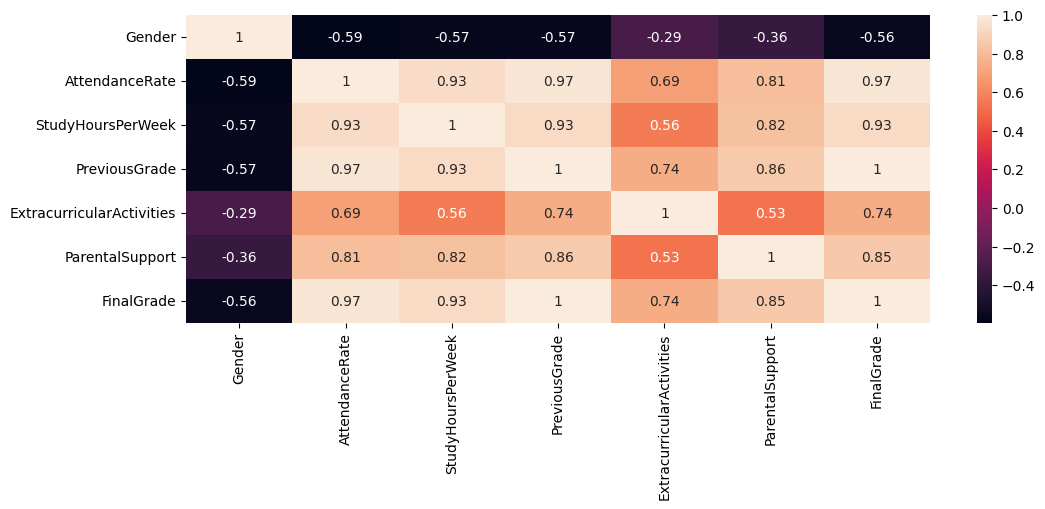

In [15]:
plt.figure(figsize=(12,4))
sns.heatmap(df.corr(),annot=True)
plt.show()

****
### Models
****

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

#### Data Preparation and Standardization

In [17]:
x=df.drop(columns='FinalGrade')
y=df['FinalGrade']
x_t,x_te,y_t,y_te=train_test_split(x,y,test_size=0.25,random_state=20)
ss=StandardScaler()
x_t=ss.fit_transform(x_t)
x_te=ss.transform(x_te)

#### Linear Regression

In [18]:
reg=LinearRegression()
reg.fit(x_t,y_t)
pred1=reg.predict(x_te)
pred2=reg.predict(x_t)

In [19]:
print("Training Metrics")
print('R2 Score: ',r2_score(y_t,pred2))
print('Mean Squared Error: ',mean_squared_error(y_t,pred2))
print('Mean Absolute Error: ',mean_absolute_error(y_t,pred2))

Training Metrics
R2 Score:  1.0
Mean Squared Error:  8.654931074424815e-29
Mean Absolute Error:  6.090366306515144e-15


In [20]:
print("Testing Metrics")
print('R2 Score: ',r2_score(y_te,pred1))
print('Mean Squared Error: ',mean_squared_error(y_te,pred1))
print('Mean Absolute Error: ',mean_absolute_error(y_te,pred1))

Testing Metrics
R2 Score:  0.9522714724399345
Mean Squared Error:  1.8136840472824893
Mean Absolute Error:  1.3287671232876666


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


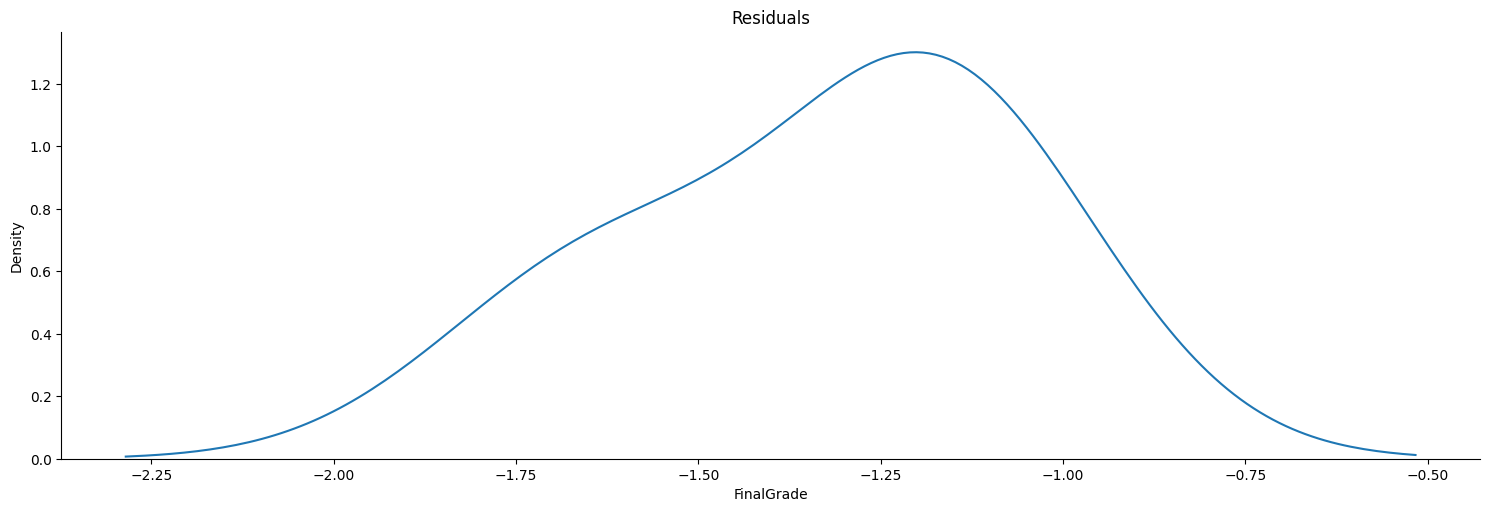

In [21]:
residuals=y_te-pred1
sns.displot(residuals, kind='kde', height=5, aspect=3)
plt.title("Residuals")
plt.show()

**Provide Suggestions and Kindly Upvote :)**